# Linear Predictive Coding (LPC)

LPC is a way to predict and analyze the sound waves so that we can compress and even recreate the speech with fewer bits of data, it will efficiently represent our voice.

# Workflow

LPC works by trying to predict each sound in the speech signal based on a few of the previous sounds. It calculates how the sound changes over time using a set of coefficients (LPC coefficients) to minimize the difference between the actual sound and the predicted sound.

The shape of your vocal tract (mouth, tongue, throat) acts like a filter, shaping the sounds produced by your vocal cords. LPC estimates this filter. The LPC coefficients describe this filter, which captures how your voice's shape changes to produce different sounds like vowels (/a/, /e/, /i/).

Instead of sending the entire speech signal. LPC sends just the LPC coefficients, which is much smaller. These coefficients can be used to reconstruct or synthesize the speech later, making it sound almost like the original.

### Loading the libraries

In [1]:
import librosa
import matplotlib.pyplot as plt
from scipy.signal import lfilter,freqz # LPC Filter
import numpy as np
from numpy.polynomial import Polynomial

### Loading the data

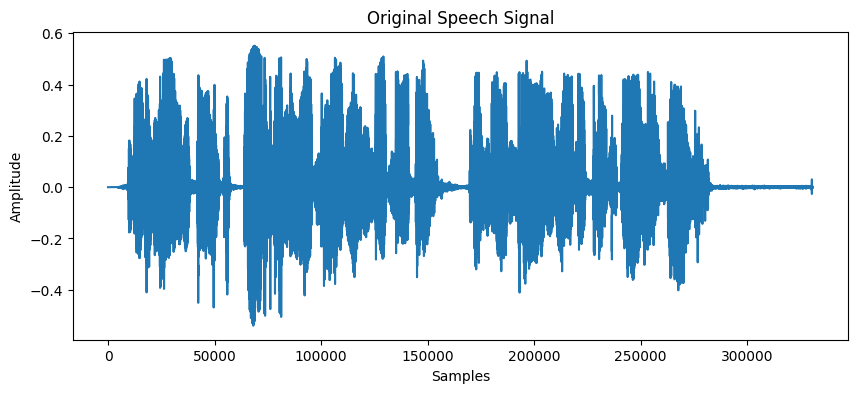

In [2]:
file_path = '/content/sam17.wav'
speech_signal, sample_rate = librosa.load(file_path, sr=None)


plt.figure(figsize=(10, 4))
plt.plot(speech_signal)
plt.title("Original Speech Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

#### Inference

Loaded the audio file using Librosa and visualized the original speech signal using matplotlib.

### LPC Algorithm and Extracting LPC Coefficients

In [3]:
def lpc_analysis(signal, order):
    return librosa.lpc(signal, order=order)

lpc_order = 12
lpc_coefficients = lpc_analysis(speech_signal, lpc_order)
print("LPC Coefficients: ", lpc_coefficients)

LPC Coefficients:  [  1.          -3.1979542    6.162904    -9.573581    12.497922
 -14.304946    14.422344   -12.7405815    9.900477    -6.6017795
   3.584653    -1.4724503    0.34188592]


#### Inference



The first value is always 1. It represents the normalization constant in the LPC filter equation. The other values are the actual predictive coefficients. These coefficients describe how the current speech sample can be predicted based on the past samples. We have 12 coefficients, which means that the current sample is being predicted from the previous 12 samples of the speech signal.


Using these coefficients we can, reconstruct the original speech signal. Estimate the formant frequencies, which help understand the resonant characteristics of the vocal tract. Compress the speech signal for efficient transmission, especially in low-bandwidth conditions.

### Reconstructing the Speech Signals from LPC Coefficients

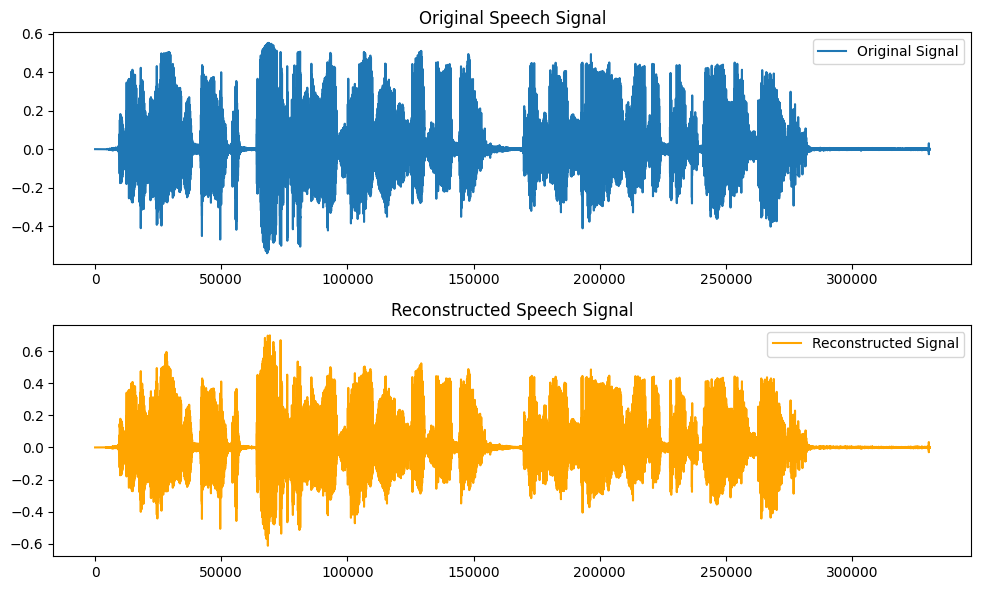

In [4]:
reconstructed_signal = lfilter([0] + -lpc_coefficients[1:], [1], speech_signal)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(speech_signal, label='Original Signal')
plt.title("Original Speech Signal")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal, label='Reconstructed Signal', color='orange')
plt.title("Reconstructed Speech Signal")
plt.legend()

plt.tight_layout()
plt.show()

### Estimate Formats from the LPC Coefficients

In [5]:
roots = np.roots(lpc_coefficients)
roots = [r for r in roots if np.imag(r) >= 0]

formant_frequencies = np.angle(roots) * (sample_rate / (2 * np.pi))
formant_frequencies = sorted(formant_frequencies)

print("Estimated Formant Frequencies: ", formant_frequencies)

Estimated Formant Frequencies:  [323.3271, 3512.767, 7997.9595, 10305.193, 13697.964, 16319.63]


#### Inference


F1 (323 Hz)

This is the first formant, typically associated with the height of the tongue in vowel production. A lower F1 generally corresponds to a higher tongue position, while a higher F1 corresponds to a lower tongue position.
A formant frequency of 323 Hz is relatively low, suggesting that the vowel produced in this segment of the speech signal is likely a high vowel (e.g., /i/ as in "beet" or /u/ as in "boot").

F2 (3512 Hz)

The second formant is related to the frontness or backness of the tongue. A higher F2 usually means the tongue is placed towards the front of the mouth (as in /i/ or /e/), while a lower F2 suggests a back vowel (like /u/).
An F2 of 3512 Hz is relatively high, which might suggest that this segment of speech contains a front vowel sound (e.g., /i/ or /e/).

F3 (7998 Hz) and higher formants (F4, F5, F6)

Formants above F3 generally reflect more subtle and individual characteristics of a person's voice (such as timbre) and are not as crucial for distinguishing vowels as F1 and F2.
F3 tends to be important for distinguishing sounds like /r/ or /l/ in speech. Values like 7998 Hz and above indicate the resonances in the vocal tract, but these are higher than typically observed in regular conversational speech.

### Visualizing Formant Frequencies

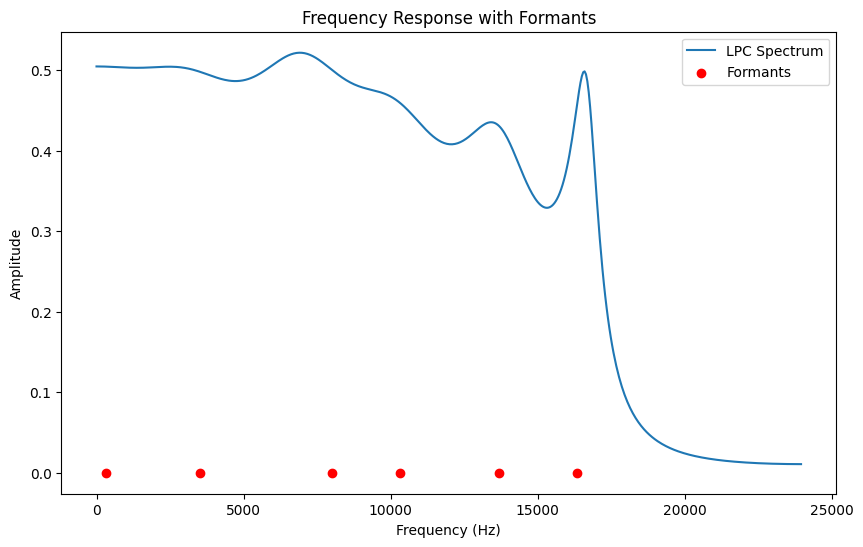

In [6]:
w, h = freqz([1], np.hstack([[1], -lpc_coefficients[1:]]), worN=512)


plt.figure(figsize=(10, 6))
plt.plot(w * sample_rate / (2 * np.pi), np.abs(h), label='LPC Spectrum')
plt.scatter(formant_frequencies, [0] * len(formant_frequencies), color='red', zorder=5, label='Formants')

plt.title("Frequency Response with Formants")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

#### Inference


The peaks of the LPC spectrum represent the resonant frequencies and the red dots indicate the specific formants derived from the LPC coefficients.

The first couple of formants (F1 and F2) helps identify the vowel characteristics.

The higher formants might correspond to additional vocal tract resonances but are often less critical for basic speech recognition.

# Conclusion

Implemented LPC, used a short voiced sample. LPC coefficients will tell the important characteristics of the vocal tract. Next estimated the formant frequencies and then reconstructed the speech signal. Then we plotted the LPC spectrum and estimated formants. The formats represented with a peaks in LPC spectrum. It improves bandwidth efficiency in realtime communication systems like VOIP and mobile networks.